# 퍼셉트론(Perceptron)
* 신경망의 기초가 되는 개념 
* 다수의 입력을 받아 하나를 출력한다.
* 입력값과 출력값은 1 아니면 0으로 두 가지 경우만 존재한다.
* <span style='color:red; font-weight:bold;'>이론적으로는</span> **퍼셉트론으로 컴퓨터를 구현하는 것이 가능하다**

## 1) 단순 퍼셉트론
* 2개의 입력을 받아 1개를 출력한다고 하자. 
* 각각의 입력값은 가중치와 만나 출력값을 결정한다. 
* 출력값을 결정하는 기준을 임계값($\theta$)이라고 한다.
* 이를 그림과 식으로 나타내면 다음과 같다. 

<center>
<img src="../images/퍼셉트론1.jpg" width="300px" margin="auto">
</center>

$$
    y = \left\{
    \begin{array}{ll}
        1, & \text{for}\quad x_1w_1 + x_2w_2 > \theta\\[5pt]
        0, & \text{for}\quad x_1w_1 + x_2w_2 \leq \theta
    \end{array}\right.
$$

* 비교를 쉽게 하기 위해 $\theta$를 왼쪽으로 이항시켜보자. 그리고 $b=-\theta$라고 하자. <br>
<u>앞으로 $w_1, w_2$는 가중치(weight), $b$를 편향(bias)라고 부를 것이다. </u>

$$
    y = \left\{
    \begin{array}{ll}
        1, & \text{for}\quad x_1w_1 + x_2w_2 + b> 0\\[5pt]
        0, & \text{for}\quad x_1w_1 + x_2w_2 + b \leq 0
    \end{array}\right.
$$


* 즉, 선형결합(linear combination)으로 1과 0을 구분하겠다는 의미로 1과 0을 **직선**으로 나눌 수 있다는 의미와 같다.<br>
아래의 표 이외에도 다양하게 조합이 가능하다.

    |AND|NAND|OR|XOR|
    |:--:|:--:|:--:|:--:|
    |<table><tr><th>x1</th><th>x2</th><th>y</th></tr><tr><td>1</td><td>1</td><td>1</td></tr><tr><td>1</td><td>0</td><td>0</td></tr><tr><td>0</td><td>1</td><td>0</td></tr><tr><td>0</td><td>0</td><td>0</td></tr></table>|<table><tr><th>x1</th><th>x2</th><th>y</th></tr><tr><td>1</td><td>1</td><td>0</td></tr><tr><td>1</td><td>0</td><td>1</td></tr><tr><td>0</td><td>1</td><td>1</td></tr><tr><td>0</td><td>0</td><td>1</td></tr></table>|<table><tr><th>x1</th><th>x2</th><th>y</th></tr><tr><td>1</td><td>1</td><td>1</td></tr><tr><td>1</td><td>0</td><td>1</td></tr><tr><td>0</td><td>1</td><td>1</td></tr><tr><td>0</td><td>0</td><td>0</td></tr></table>|<table><tr><th>x1</th><th>x2</th><th>y</th></tr><tr><td>1</td><td>1</td><td>0</td></tr><tr><td>1</td><td>0</td><td>1</td></tr><tr><td>0</td><td>1</td><td>1</td></tr><tr><td>0</td><td>0</td><td>0</td></tr></table>|

<br/>

* 쉽게 확인하기 위해 그림으로 나타내보자.

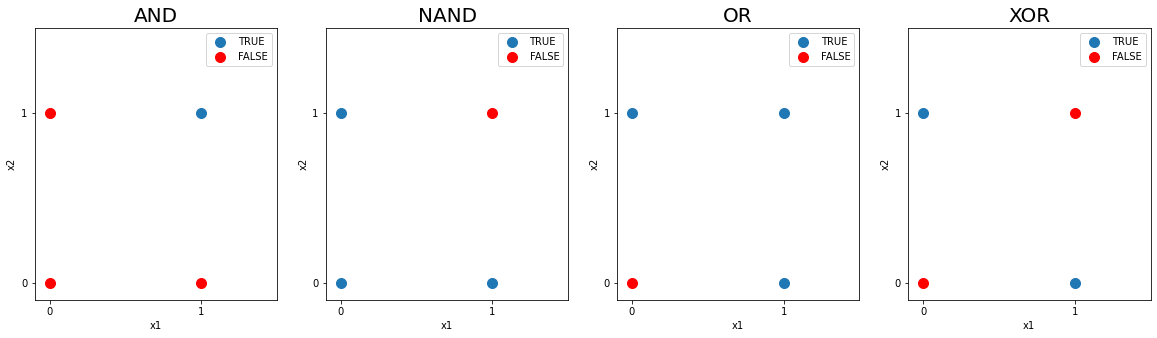

In [150]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 

df = pd.DataFrame({'x1':[1, 1, 0, 0], 'x2':[1, 0, 1, 0]})
df['AND'] = np.array([1, 0, 0, 0])
df['NAND'] = np.array([0, 1, 1, 1])
df['OR'] = np.array([1, 1, 1, 0])
df['XOR'] = np.array([0, 1, 1, 0])

col_lst = df.columns[2:]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, col in enumerate(col_lst):
    df[df[col]==True].plot(x='x1', y='x2', kind='scatter', label='TRUE', s=100, ax=axes[i])
    df[df[col]==False].plot(x='x1', y='x2', kind='scatter', color='red', label='FALSE', s=100, ax=axes[i])
    axes[i].set_title(col, size=20)
    axes[i].legend()
    axes[i].set_xlim(-0.1,1.5)
    axes[i].set_ylim(-0.1,1.5)
    axes[i].set_xticks([0, 1])
    axes[i].set_yticks([0, 1])
plt.show()


* 빨간 점과 파란 점을 직선으로 나눌 수 있을까? $\Rightarrow$ XOR빼고는 전부 가능하다.<br>
뿐만 아니라 가중치에 따라 나눌 수 있는 직선을 무수히 많이 만들 수 있다. 
* <b><u>그렇다면 XOR은 무엇일까?</u></b>



## 2) 단순 퍼셉트론의 한계
* XOR은 '배타적 논리합(exclusive OR)'으로 서로 논리가 다르면 TRUE, 같으면 FALES를 반환하는 것이다. 
* 위의 그림으로 알 수 있듯이 XOR은 직선으로 구분할 수 없다. 이 논리로 인해 한동안 인공지능 연구가 침체기를 겪었다고 한다.


## 3) 다층 퍼셉트론 등장
* 고정관념을 깨고 층을 하나 더 쌓아보자는 아이디어가 등장 $\rightarrow$ 단층 퍼셉트론들을 조합해서 XOR을 만들어보자 <br>
$\Rightarrow$ NAND의 결과와 OR의 결과를 AND로 조합했더니 완성되었다!

    |NAND|OR|XOR|
    |:--:|:--:|:--:|
    |<table><tr><th>x1</th><th>x2</th><th>NAND</th></tr><tr><td>1</td><td>1</td><td>0</td></tr><tr><td>1</td><td>0</td><td>1</td></tr><tr><td>0</td><td>1</td><td>1</td></tr><tr><td>0</td><td>0</td><td>1</td></tr></table>|<table><tr><th>x1</th><th>x2</th><th>OR</th></tr><tr><td>1</td><td>1</td><td>1</td></tr><tr><td>1</td><td>0</td><td>1</td></tr><tr><td>0</td><td>1</td><td>1</td></tr><tr><td>0</td><td>0</td><td>0</td></tr></table>|<table><tr><th>NAND</th><th>OR</th><th>AND</th></tr><tr><td>0</td><td>1</td><td>0</td></tr><tr><td>1</td><td>1</td><td>1</td></tr><tr><td>1</td><td>1</td><td>1</td></tr><tr><td>1</td><td>0</td><td>0</td></tr></table>|
<br/>

* XOR은 2층 퍼셉트론으로 구현이 가능했다. 그렇다면 더 어려운 상황에서도 분류할 수 있지 않을까?<br>
즉 더이상 선형으로 나누는 것이 아니기 때문에 **이론상** 어떤 상황이든 분류가 가능하게 된 것이다.


# 신경망(Neural Network, NN)

<center>
    <img src="../images/신경망1.jpg" width="300px">
</center>

* 신경망은 입력층 + 은닉층 + 출력층으로 나뉜다. 층을 더 깊게 설정하기 위해서는 은닉층의 수를 늘리면 된다. 
* 각 노드의 개수는 사용자에 따라 다양하게 설정이 가능하다. 
* 기준에 따라 이름이 달라진다. '밑바닥부터 시작하는 딥러닝'의 경우 가중치를 기준으로 정의했다.
    * 위의 그림으로 살펴보면 노드가 있는 층의 개수로 하면 3층 신경망이지만, 가중치를 기준으로 하면 2층 신경망이다. 
* 퍼셉트론과의 가장 큰 차이는 <b>활성화 함수(activation function)</b>의 등장이다.


## 1) 신경망 구조 이해하기 

<center>
    <img src="../images/신경망2.jpg" width="400px"><br>
    <img src="../images/신경망4.jpg" width="1000px">
</center>
<br>

신경망 구조를 행렬로 이해하면 굉장히 편하다. 3층 신경망(가중치 기준)을 예시로 살펴보자.

### (0층 $\rightarrow$ 1층)

$$
    \begin{aligned}
    &a_{1}^{(1)} = b_1^{(1)} + x_{1}w_{11}^{(1)} + x_{2}w_{12}^{(1)}\\
    &a_{2}^{(1)} = b_2^{(1)} + x_{1}w_{21}^{(1)} + x_{2}w_{22}^{(1)}\\
    &a_{3}^{(1)} = b_3^{(1)} + x_{1}w_{31}^{(1)} + x_{2}w_{32}^{(1)}
    \end{aligned}\quad \Rightarrow \quad 
    
    \begin{bmatrix}
    a_{1}^{(1)}& a_{2}^{(1)}& a_{3}^{(1)}
    \end{bmatrix}=
    \begin{bmatrix} x_1 & x_2\end{bmatrix}
    \begin{bmatrix}
    w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\
    w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)} 
    \end{bmatrix} +
    \begin{bmatrix}b_1^{(1)}& b_2^{(1)}& b_3^{(1)}\end{bmatrix}
$$
$$
    \begin{bmatrix}
    z_{1}^{(1)}& z_{2}^{(1)}& z_{3}^{(1)}
    \end{bmatrix}=h\left(
    \begin{bmatrix}
    a_{1}^{(1)}& a_{2}^{(1)}& a_{3}^{(1)}
    \end{bmatrix}
    \right)
$$

### (1층 $\rightarrow$ 2층)

$$
    \begin{aligned}
    &a_{1}^{(2)} = b_1^{(2)} + z_{1}^{(1)}w_{11}^{(2)} + z_{2}^{(1)}w_{12}^{(2)} + z_{3}^{(1)}w_{13}^{(2)}\\
    &a_{2}^{(2)} = b_2^{(2)} + z_{1}^{(1)}w_{21}^{(2)} + z_{2}^{(1)}w_{22}^{(2)} + z_{3}^{(1)}w_{23}^{(2)}\\
    \end{aligned}\quad \Rightarrow \quad 
    
    \begin{bmatrix}
    a_{1}^{(2)}& a_{2}^{(2)}
    \end{bmatrix}=
    \begin{bmatrix} z_1^{(1)} & z_2^{(1)} & z_3^{(1)}\end{bmatrix}
    \begin{bmatrix}
    w_{11}^{(2)} & w_{21}^{(2)}  \\
    w_{12}^{(2)} & w_{22}^{(2)}  \\
    w_{13}^{(2)} & w_{23}^{(2)}  
    \end{bmatrix} +
    \begin{bmatrix}b_1^{(2)}& b_2^{(2)}\end{bmatrix}
$$
$$
    \begin{bmatrix}
    z_{1}^{(2)}& z_{2}^{(2)}
    \end{bmatrix}=h\left(
    \begin{bmatrix}
    a_{1}^{(2)}& a_{2}^{(2)}
    \end{bmatrix}
    \right)
$$


### (2층 $\rightarrow$ 3층)

$$
    \begin{aligned}
    &a_{1}^{(3)} = b_1^{(3)} + z_{1}^{(2)}w_{11}^{(3)} + z_{2}^{(2)}w_{12}^{(3)}\\
    &a_{2}^{(3)} = b_2^{(3)} + z_{1}^{(2)}w_{21}^{(3)} + z_{2}^{(2)}w_{22}^{(3)}\\
    \end{aligned}\quad \Rightarrow \quad 
    
    \begin{bmatrix}
    a_{1}^{(3)}& a_{2}^{(3)}
    \end{bmatrix}=
    \begin{bmatrix} z_1^{(2)} & z_2^{(2)} \end{bmatrix}
    \begin{bmatrix}
    w_{11}^{(3)} & w_{21}^{(3)}  \\
    w_{12}^{(3)} & w_{22}^{(3)}  \\
    \end{bmatrix} +
    \begin{bmatrix}b_1^{(3)}& b_2^{(3)}\end{bmatrix}
$$
$$
    \begin{bmatrix}
    y_1& y_2
    \end{bmatrix}=h\left(
    \begin{bmatrix}
    a_{1}^{(3)}& a_{2}^{(3)}
    \end{bmatrix}
    \right)
$$

* 노드의 수는 $2 \rightarrow 3\rightarrow 2\rightarrow 2$이다. <br>
가중치 행렬의 크기를 각각 살펴보자. $(2\times 3)\rightarrow (3\times 2)\rightarrow (2\times 2)$임을 알 수 있다. 즉, 노드의 개수에 따라 크기가 달라진다.

## 2) 활성화 함수 

<center>
    <img src="../images/신경망3.jpg" width="300px">
</center>

* 편향과 가중치의 결합으로 계산된 $a$를 <u>활성화 함수</u>를 통해 출력값을 출력한다.
* 왜 활성화 함수가 필요할까? $\Rightarrow$ <span style="color:red; font-weight:bold">가중치 업데이트</span>를 하기 위함이다. 
* 먼저 퍼셉트론에 대해 활성화 함수를 나타내보자. 퍼셉트론에서는 임계값 0을 기준으로 1과 0을 반환한다. 즉, 계단 함수(Step function)를 말한다. 

$$
    y = \left\{\begin{array}{ll}1, & x > 0\\ 0, & x \leq 0\end{array}\right.
$$

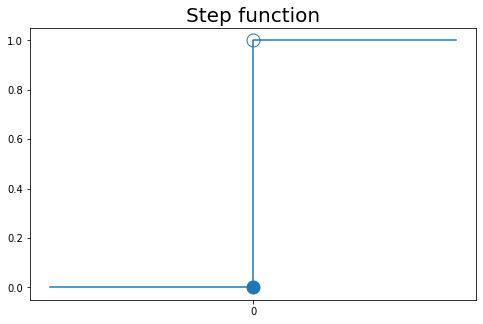

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

x = np.array([-2, -1, 0, 0, 1, 2])
y = np.array([0]*3 + [1]*3)

fig = plt.figure(figsize=(8, 5))
plt.plot(x, y)
plt.plot(0, 0, 'o', color='#1f77b4', markersize=13)
plt.plot(0, 1, 'o', color='#1f77b4', fillstyle='none', markersize=13)
plt.title('Step function', size=20)
plt.xticks([0])
plt.show()

* 가중치를 업데이트 하기 위해서는 <u><b>미분</b></u>을 이용하게 되는데 계단 함수의 경우 1) 불연속이고 2) 미분이 불가능하기 때문에 적절하지 않다. <br>
값이 0인 경우에만 출력값이 바뀌기 때문에 가중치를 업데이트하는데 어려움이 많다. 

### (1) 시그모이드 함수(Sigmoid function)

$$
    y = \dfrac{1}{1 + e^{-x}}
$$

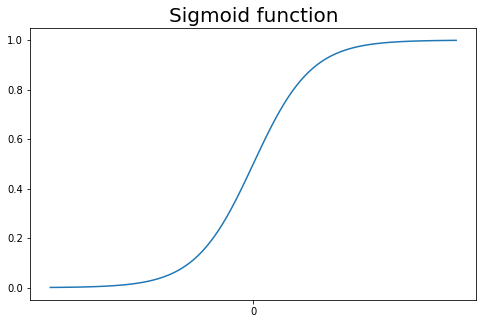

In [9]:
import numpy as np
import matplotlib.pyplot as plt 

x = np.linspace(-7, 7, 100)
y = 1 / (1 + np.exp(-x))

fig = plt.figure(figsize=(8, 5))
plt.plot(x, y)
plt.title('Sigmoid function', size=20)
plt.xticks([0])
plt.show()

### (2) 렐루 함수(ReLu function)

$$
    y = \left\{\begin{array}{ll}x, & x > 0\\ 0, & x \leq 0\end{array}\right.
$$

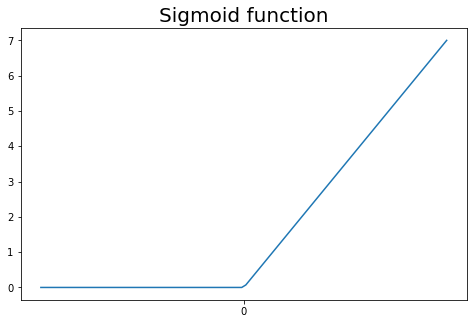

In [11]:
import numpy as np
import matplotlib.pyplot as plt 

x = np.linspace(-7, 7, 100)
y = (x > 0) * x

fig = plt.figure(figsize=(8, 5))
plt.plot(x, y)
plt.title('Sigmoid function', size=20)
plt.xticks([0])
plt.show()

### (3) 소프트맥스 함수(Softmax function)

$$
    y_k = \dfrac{e^{a_k}}{\sum\limits_{i=1}^n e^{a_i}}
$$

## 3) 가중치 학습

### (1) 경사하강법
* 손실함수가 최솟값일 때 매개변수(parameter)의 값을 찾는 방법
* **미분**을 이용한다

#### 손실함수(Loss function)

1. 오차제곱합

$$
    \begin{aligned}
        \text{cost} &= \dfrac{1}{2}\sum_{i=1}^n (y_i - \hat{y}_i)^2\\
        &= \dfrac{1}{2}\sum_{i=1}^n (y_i - (ax_i + b))^2\\
        \dfrac{d \text{cost}}{da} 
        &= \sum_{i=1}^n x_i(y_i - (ax_i + b))\\
        \dfrac{d \text{cost}}{db} 
        &= \sum_{i=1}^n (y_i - (ax_i + b))\\
    \end{aligned}
$$

2. 최대우도함수

$$
    P(Y = 1) = p^x(1-p)^{1-x},\quad x = 0, 1
$$
$$
    \begin{aligned}
        L(p) &= \binom{n}{a_{1}a_{2}\cdots a_k} p_1^{a_1}p_2^{a_2}\cdots p_n^{a_n}\\
        l(p) &= a_1 \log p_1 + a_2 \log p_2 + \cdots + \log a_n p_n\\
        l(p) &= \sum_{k=1}^n a_k \log p_n
    \end{aligned}
$$

### 경사하강법 과정(회귀분석하는 경우)
<div style='font-weight:bold'>
<font color='blue'>IDEA!</font> 
기울기가 0이 될 때까지 계속 반복하면서 이동해보자.
</div>

그럼 어떻게 자동으로 이동시킬까? $\Rightarrow$ 기울기에 비례하게! 나도 설정할 수 있게!
* 기울기가 크다는 것은 아직 기울기가 0인 곳까지 도착하려면 멀었다는 의미 $\rightarrow$ 크게 움직이자. 
* 기울기가 작다는 것은 곧 기울기가 0인 곳에 도착한다는 의미 $\rightarrow$ 작게 움직이자.
* 나도 움직임의 크기에 영향을 주고 싶다. $\rightarrow$ 학습률(learning rate) 등장 

$\Rightarrow$ **(학습률$\times$기울기)만큼 움직이자!**

<center>
    <img src="../images/gd.png" width="300px">
</center>

* 기울기가 +이면(A) 왼쪽(-)으로 이동
* 기울기가 -이면(B) 오른쪽(+)으로 이동 

$\Rightarrow$ **a = a - lr * (a일 때 기울기), b = b - lr * (b일 때 기울기)**

**STEP 1**. 반복 횟수(epochs), 학습률(learning rate)과 초기값 $a, b$를 설정한다. <br>
**STEP 2**. 예측값($\hat{y}$)을 계산한다. $\hat{y}_i = b + ax_i$<br>
**STEP 3**. MSE의 기울기 값을 계산한다. <br>
**STEP 4**. 새로운 a, b를 업데이트 한다. <br>
**STEP 5**. MSE를 계산한다. $MSE = (y - \hat{y})^2$<br>
**STEP 6**. STEP2 ~ STEP5을 epochs 만큼 반복

#### 기울기 소실 문제 : 계속 활성화함수에 sigmoid를 쓸 수 없는 이유
* 계속 미분을 하게되면 그 값이 계속 작아져서 나중에는 0에 너무 가까워지게 된다.

In [20]:
from sympy import *
import numpy as np 

x = Symbol('x')
y = 1 / (1 + exp(-x))

dydx = diff(y, x)
dydx

exp(-x)/(1 + exp(-x))**2

In [21]:
dydx2 = diff(dydx, x)
dydx2

-exp(-x)/(1 + exp(-x))**2 + 2*exp(-2*x)/(1 + exp(-x))**3

Text(0.5, 1.0, 'dy2/dx2')

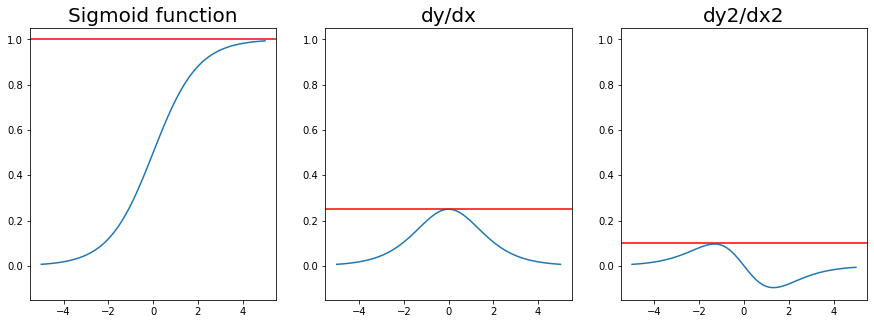

In [49]:
import numpy as np
 
x = np.linspace(-5, 5, 100)
y = 1 / (1 + np.exp(-x))
dydx = np.exp(-x) / ((1 + np.exp(-x)) ** 2)
dydx2 = -dydx + 2 * np.exp(-2*x) / ((1 + np.exp(-x)) ** 3)

fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(x, y)
plt.axhline(1, color='red')
plt.ylim(-0.15, 1.05)
plt.title('Sigmoid function', size=20)

plt.subplot(132)
plt.plot(x, dydx)
plt.axhline(0.25, color='red')
plt.ylim(-0.15, 1.05)
plt.title('dy/dx', size=20)

plt.subplot(133)
plt.plot(x, dydx2)
plt.axhline(0.1, color='red')
plt.ylim(-0.15, 1.05)
plt.title('dy2/dx2', size=20)

### (2) 오차역전법
* 미분을 하는 과정은 매우 복잡하고 시간 또한 많이 걸린다.
* 오차역전법을 이용하면 빠르게 계산이 가능하다.

<center>
<img src='https://heung-bae-lee.github.io/image/Deep_Neural_Network.png' width="50%" caption='[출처]https://heung-bae-lee.github.io/2019/12/08/deep_learning_03/'>
</center>


### (1) 계산그래프로 이해하기 
* 순전파: 사과를 샀을 때 내가 지불해야할 금액은?
* 역전파: 사과를 하나 샀을 때 금액이 얼마나 늘어나는가?

#### 연쇄법칙 
* 여러 함수로 구성된 함수를 합성함수라고 하는데 이를 미분할 때 쓰인다. 
$$
    z = (x + y)^2\\
    t = x + y,\quad z = t^2
$$

$$
    \begin{aligned}
    \dfrac{\partial z}{\partial x} 
    &= \dfrac{\partial z}{\partial t}\dfrac{\partial t}{\partial x}\\
    &= 2t \cdot 1
    \end{aligned}
$$

* $x$가 매개변수일때 덧셈에 대한 역전파: $x + y \rightarrow 1$
* $x$가 매개변수일때 곱셈에 대한 역전파: $xy \rightarrow y$

<center>
    <img src="images/역전파1.png" width="700px">
</center>

### (2) 활성화함수 계층 구현하기
#### 시그모이드 함수 
**<순전파>** 
1. $x$와 -1을 곱한다.$\rightarrow -x$
2. $\exp$를 씌운다.$\rightarrow \exp(-x)$
3. 1을 더한다.$\rightarrow 1+\exp(-x)$
4. 역수를 취한다.

**<역전파>**
1. (4) $y=\dfrac{1}{t_3}$를 $t_3$에 대해 미분 
$\rightarrow \dfrac{\partial t_4}{\partial t_3}=-\dfrac{1}{t_3^2}=-y^2$
2. (3) $t_3 = t_2 + 1$를 $t_2$에 대해 미분 
$\rightarrow \dfrac{\partial t_3}{\partial t_2}=1$
3. (2) $t_2=\exp(t_1)$를 $t_1$에 대해 미분 
$\rightarrow \dfrac{\partial t_2}{\partial t_1}=\exp(t_1)=t_2$
4. (1) $t_1=-x$를 $x$에 대해 미분 
$\rightarrow \dfrac{\partial t_1}{\partial x}=-1$

<center>
    <img src="../images/역전파2.png" width="80%">
</center>